In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [88]:
df = pd.read_csv('penguins.csv')

df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [90]:
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

df.sex.value_counts()

sex
MALE      178
FEMALE    165
.           1
Name: count, dtype: int64

In [91]:
df = df[df['sex'] != '.']

df.sex.value_counts()

sex
MALE      178
FEMALE    165
Name: count, dtype: int64

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   341 non-null    float64
 1   culmen_depth_mm    341 non-null    float64
 2   flipper_length_mm  341 non-null    float64
 3   body_mass_g        341 non-null    float64
 4   sex                343 non-null    object 
dtypes: float64(4), object(1)
memory usage: 16.1+ KB


In [93]:
df['culmen_length_mm'] = df['culmen_length_mm'].fillna(df.culmen_length_mm.mean())
df['culmen_depth_mm'] = df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean())
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df.flipper_length_mm.mean())
df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].mean())

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   343 non-null    float64
 1   culmen_depth_mm    343 non-null    float64
 2   flipper_length_mm  343 non-null    float64
 3   body_mass_g        343 non-null    float64
 4   sex                343 non-null    object 
dtypes: float64(4), object(1)
memory usage: 16.1+ KB


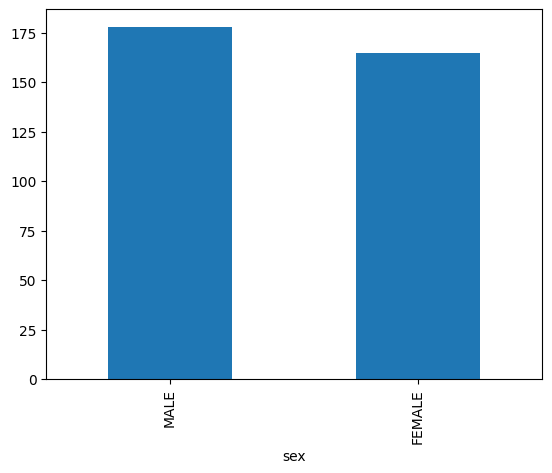

In [94]:
variables = ['sex']

for var in variables:
    counts = df[var].value_counts()
    counts.plot(kind='bar')
    plt.show()

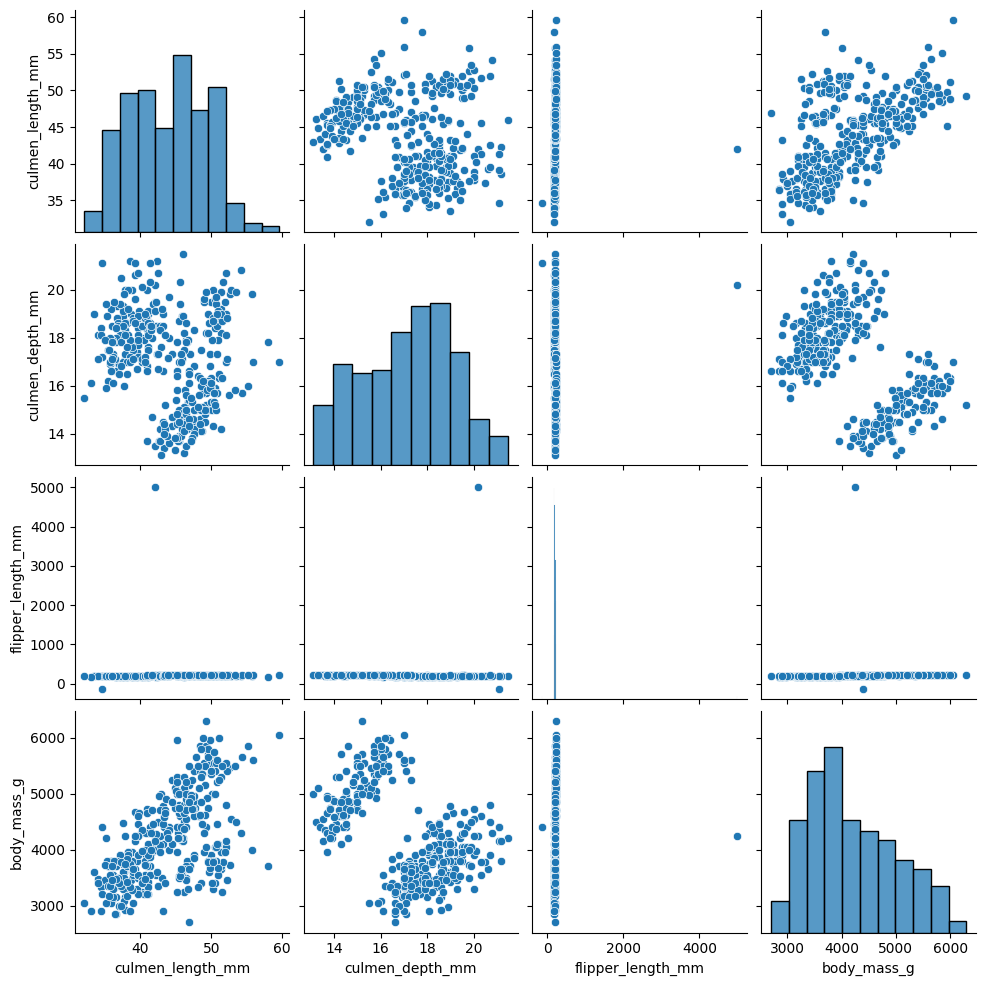

In [95]:
sns.pairplot(df)

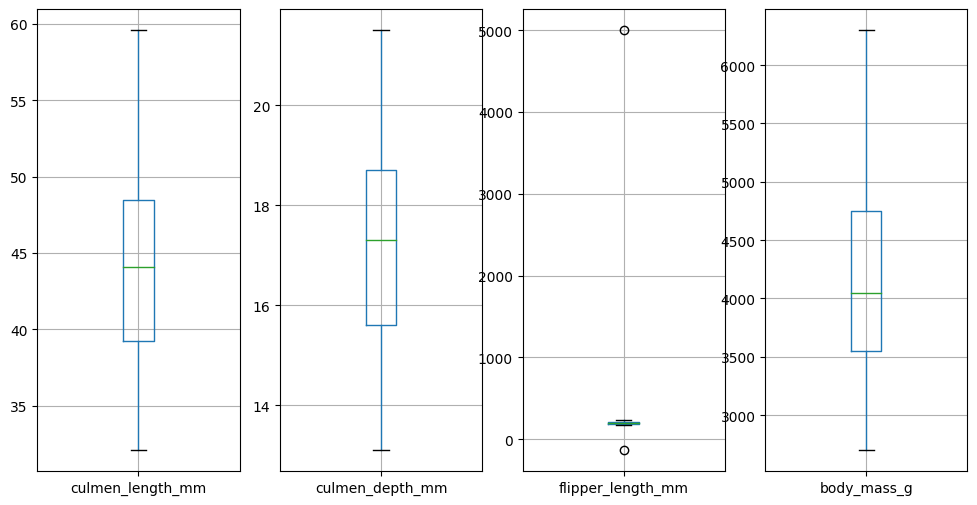

In [96]:
variables = ['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']

n_vars = len(variables)

fig, axes = plt.subplots(ncols=n_vars, figsize=(12,6) )

for i, var in enumerate(variables):
    ax = axes[i]
    df.boxplot(column=var, ax=ax)



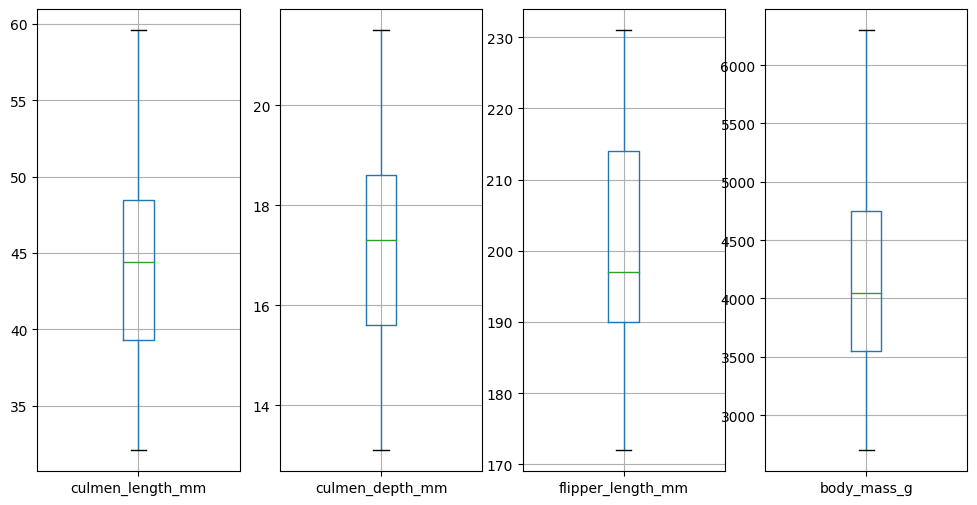

In [97]:
def removeIQR(df,variables):
    for var in variables:
        Q1 = df[var].quantile(0.25)
        Q3 = df[var].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[var] > lower_bound) & (df[var] < upper_bound)]
    return df

df = removeIQR(df,['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g'])

variables = ['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']

n_vars = len(variables)

fig, axes = plt.subplots(ncols=n_vars, figsize=(12,6) )

for i, var in enumerate(variables):
    ax = axes[i]
    df.boxplot(column=var, ax=ax)

In [98]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']] = scaler.fit_transform(df[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']])

df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,341.000000,341.000000,341.000000,341.000000
mean,0.431025,0.480349,0.491277,0.416402
std,0.197927,0.233030,0.238604,0.222839
min,0.000000,0.000000,0.000000,0.000000
25%,0.261818,0.297619,0.305085,0.236111
50%,0.447273,0.500000,0.423729,0.375000
75%,0.596364,0.654762,0.711864,0.569444
max,1.000000,1.000000,1.000000,1.000000


In [99]:
df = pd.get_dummies(df,columns=['sex'],dtype=int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 341 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   341 non-null    float64
 1   culmen_depth_mm    341 non-null    float64
 2   flipper_length_mm  341 non-null    float64
 3   body_mass_g        341 non-null    float64
 4   sex_FEMALE         341 non-null    int32  
 5   sex_MALE           341 non-null    int32  
dtypes: float64(4), int32(2)
memory usage: 16.0 KB


In [100]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

df = pd.DataFrame(pca.fit_transform(df),columns=['PC1','PC2'])

df.head()

,PC1,PC2
0,-0.615072,-0.498268
1,0.765850,-0.192941
2,0.761632,-0.206282
3,-0.688820,0.050810
4,0.754958,-0.323744


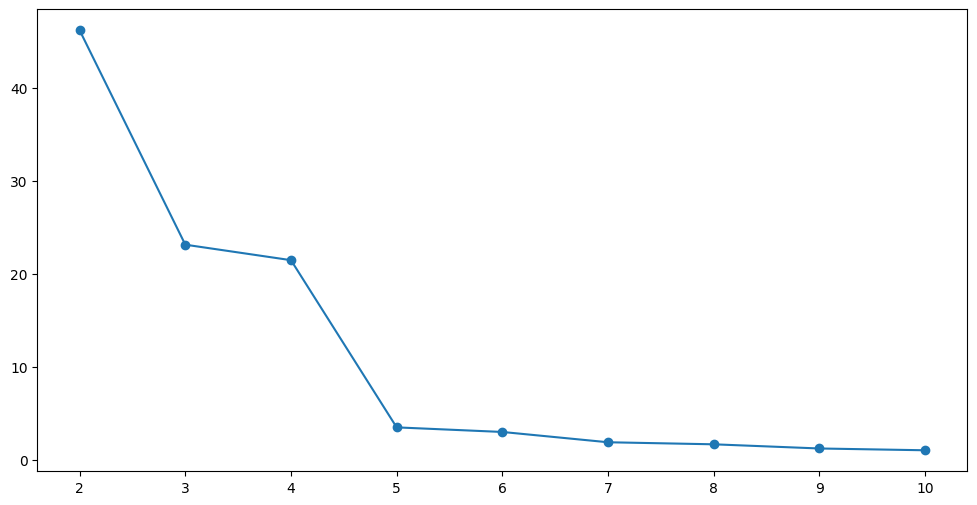

In [101]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

elbow = []

for i in range (2,11):
    cls = KMeans(n_clusters=i, random_state=42).fit(df)
    # cls.fit(df)
    elbow.append(cls.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(2,11),elbow,marker='o')
plt.show()

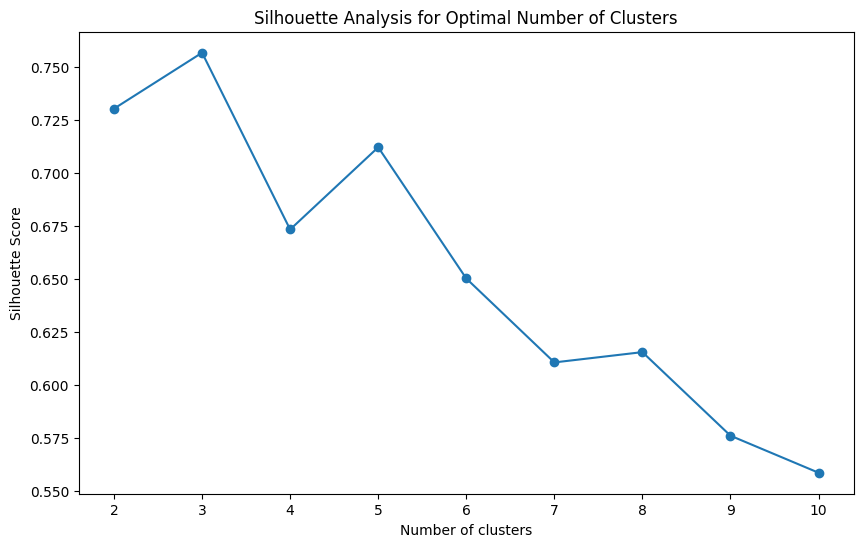

In [102]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(df, labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal Number of Clusters')
plt.show()

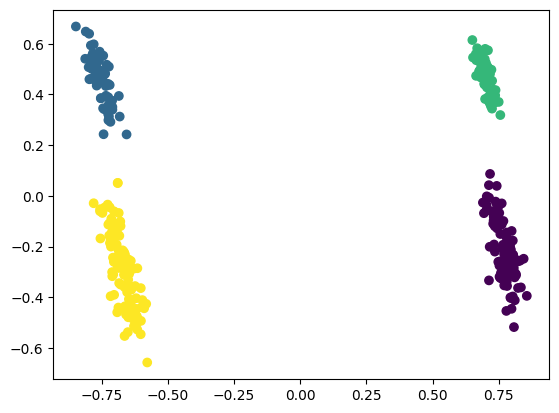

In [103]:
kmeans = KMeans(n_clusters=4)

cls = kmeans.fit(df)

df['Cluster'] = cls.labels_


plt.scatter(df['PC1'],df['PC2'],c=df['Cluster'])

plt.show()